<img src="front_presentation_exoplanets.png">
(Credits: Wing-Fai Thi)

## Exploring the Kepler and other exoplanet datasets
### Can machine learning algorithm determine if an exoplanet is habitable?

_version 1 (19/3/2018)_

_version 1.1 (29/3/2018) introduce the notion of compressed density and uncompressed density, generate more plots, predict the habitability of Solar System planets_

_version 1.2 (29/5/2024) 2024 data and ported to python >= 3.9

_Wing-Fai Thi_

_26/3/2018: there is a bug in /Library/Python/2.7/site-packages/sklearn/preprocessing/label.py Please copy the corrected version from the GitHub site sklearn::master and replace it_

- Dataset from The Planet Habitability Laboratory's Exoplanets Catalog at the Univeristy of Puerto Rico https://phl.upr.edu/hwc

from their website:

The PHL's Exoplanets Catalog (PHL-EC) contains observed and modeled parameters for all currently confirmed exoplanets from the Extrasolar Planets Encyclopedia and NASA Kepler candidates from the NASA Exoplanet Archive, including those potentially habitable. It also contains a few still unconfirmed exoplanets of interest. The main difference between PHL-EC and other exoplanets databases is that it contains more estimated stellar and planetary parameters, habitability assessments with various habitability metrics, planetary classifications, and many corrections. Some interesting inclusions are the identification of those stars in the Catalog of Nearby Habitable Systems (HabCat), the apparent size and brightness of stars and planets as seen from a vantage point (i.e. moon-Earth distance), and the location constellation of each planet.

Many scientists use the PHL-EC and its derived products, like The Habitable Exoplanets Catalog and The Periodic Table of Exoplanets, for research or educational purposes. Software tools, such as the Google Android application Exoplanet Explorer, also use the catalog for visualizations. The PHL-EC is available as a comma separated value format (CSV) file at the bottom of this page. It is easily readable by spreadsheets like MS Excel and by most scientific plotting software.

- Dataset from the exoplanet catalogue.

#### Aim of the notebook:
- explore the exoplanet detection and characterisation statistics
- classification of exoplanets acording to their type and habitability

#### Ref.
- Patrick Irwine Giant Planets of out Solar System 2nd edition, Springer
- Helmut Lammer and Maxim Khodachenko editors, Characterizating Stellar and Exoplanetary Environments, Springer
- Michael Carr & James Bell III Mars: Surface and interior, in Encyclopedia of the Solar System, 2014 Elsevier
- Nikku Madhusudhan et al. Exoplanetary Atmopsheres, Protostars and protoplanets VI
- Michal Endl Extrasolar Planets, in Encyclopedia of the Solar System, 2014 Elsevier
- Ollivier M., Encrenaz T., Roques F., Selsis F., Casoli, F. Planetary Systems A&A Library, Springer
- Eugen Milone and William Wilson Solar System Astrophysics, Springer
- Helmut Lammer Origin and Evolution of Planetary Atmosphers - Implication for habitability,Springer
- Methods of Detecting Exoplanets, V. Bozza, Mancini, A.Sozzetti editors, 2016, Springer
- P. Cassen, T. Guillot, A. Quirrenbach, Extrasolar Planets, Saas-Fee Springer
- Scott L. Murchie et al. Mercury in Encyclopedia of the Solar System. http://dx.doi.org/10.1016/B978-0-12-415845-0.00013-X Copyright ! 2014 Elsevier Inc.
- Leland Wilkinson The Grammar of Graphics, Springer
- Handbook of Data Visualization Springer

### Variable explanations

Data Source

The HWC uses exoplanet data from the Planetary Systems Composite Parameters Planet Data of the NASA Exoplanet Archive with additions and corrections from other sources, including papers. This data provides a more comprehensive dataset of planetary properties but is more prone to inconsistencies due to multiple independent sources. Therefore, the HWC should be only used as a guideline for further data exploration of the individual planets of interest.

Main Variables

The HWC includes many measured, derived, and modeled stellar and planetary properties available in the full database (see Data section). Here is a description of the properties shown in the summary tables (Tables 1 and 2).

- Name - Name of the planet. This links to the data of the planet at the NASA Exoplanet Archive.

- Type - PHL's classification of planets that includes host star spectral type (F, G, K, M), habitable zone location (hot, warm, cold), and size (miniterran, subterran, terran, superterran, jovian, neptunian) (e.g., Earth = G-Warm Terran, Venus = G-Hot Terran, Mars = G-Warm Subterran).

- Mass - Mass of the planet in Earth masses (Earth = 1.0 ME). Mass was estimated (denoted by ~) from radius when not available using Chen & Kipping (2016). Usually, we only know the minimum mass for radial velocity planets (denoted ≥). Some planets have upper mass measurements (denoted <).

- Radius - Radius of the planet in Earth radii (Earth = 1.0 RE). Radius was estimated (denoted ~) from mass when not available using Chen & Kipping (2016). 

- Flux - Average stellar flux of the planet in Earth fluxes (Earth = 1.0 SE).

- Tsurf - The estimated surface temperature in Kelvins (K) assuming an Earth-like atmosphere (i.e., same bond albedo and greenhouse) using Méndez & Rivera-Valentín (2017) (denoted ~). Temperatures could be much larger for thicker atmospheres (Earth = 288 K).

- Period - Orbital period in days (Earth = 365 days).

- Distance - Distance from Earth in light-years (ly).

- Age - Star age in billion years. Some are lower or upper limits (denoted > or <) (Sun = 4.6 Gy).

- ESI - Earth Similarity Index, a measure of similarity to Earth's stellar flux, and mass or radius (Earth = 1.0). Results are sorted by this number. Planets that are more similar to Earth on this scale are not necessarily more habitable.

In [1]:
import os
import urllib.request
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams

import seaborn as sb
import pandas as pd
import scipy.stats as stats

# get configuration file location
#print (mpl.matplotlib_fname())

# get configuration current settings
#print (mpl.rcParams)
default = mpl.rcParams
# Change the default settings
mpl.rcParams.update({'figure.figsize': (9.0, 7.0),
                     'figure.dpi' : 300, # 300 dpi for print
                    'font.size': 14,
                     'legend.frameon': False,              
                     'legend.fontsize' : 12, 
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16,
                     'axes.labelsize'  : 18  
                    })

In [2]:
path = 'hwc.csv'
isExist = os.path.exists(path) 
if not isExist:
    url = "https://www.hpcf.upr.edu/~abel/phl/hwc/data/hwc.csv"
    urllib.request.urlretrieve(url, "hwc.csv")
hwc = pd.read_csv('hwc.csv')

In [3]:
hwc.info() # uncomment if you want to list the header

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5599 entries, 0 to 5598
Columns: 118 entries, P_NAME to S_CONSTELLATION_ENG
dtypes: float64(81), int64(18), object(19)
memory usage: 5.0+ MB


In [4]:
hwc.describe()

,P_YEAR,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_MASS_LIMIT,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_RADIUS_LIMIT,P_PERIOD,...,S_HZ_CON0_MAX,S_HZ_CON1_MIN,S_HZ_CON1_MAX,S_SNOW_LINE,S_ABIO_ZONE,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,P_HABITABLE,P_ESI
count,5599.000000,5592.000000,2506.000000,2506.000000,5599.000000,5592.000000,3847.000000,3847.000000,5599.000000,5.350000e+03,...,5366.000000,5366.000000,5366.000000,5366.000000,5.376000e+03,5595.000000,5599.000000,5599.000000,5599.000000,5358.000000
mean,2016.188962,442.521283,-127.777520,174.465166,0.022861,5.715494,-0.432279,0.544259,-0.000714,7.994082e+04,...,2.301153,1.239781,2.301153,3.596167,1.014471e+35,0.425790,0.047151,0.033577,0.019825,0.257089
std,4.527714,2369.505048,383.670428,625.151645,0.160982,5.331450,0.960669,1.568228,0.026721,5.498596e+06,...,4.587874,2.390133,4.587874,6.741964,5.259131e+36,0.077064,0.211981,0.180155,0.184617,0.131622
min,1992.000000,0.020000,-6038.739700,0.000000,-1.000000,0.310000,-32.506000,0.000000,-1.000000,9.070629e-02,...,0.001910,0.000911,0.001910,0.002434,4.356319e-05,0.029269,0.000000,0.000000,0.000000,0.023896
25%,2014.000000,4.040000,-73.100900,2.712500,0.000000,1.780000,-0.480000,0.130000,0.000000,4.465382e+00,...,1.060687,0.568834,1.060687,1.615711,4.781093e-01,0.391256,0.000000,0.000000,0.000000,0.186192
50%,2016.000000,8.750000,-19.069800,20.000000,0.000000,2.780000,-0.220000,0.280000,0.000000,1.156951e+01,...,1.561742,0.854147,1.561742,2.502441,1.361846e+00,0.443760,0.000000,0.000000,0.000000,0.268055
75%,2020.000000,162.092490,-2.542630,85.813670,0.000000,11.900000,-0.110000,0.581500,0.000000,4.150555e+01,...,2.364700,1.299225,2.364700,3.873593,2.556535e+00,0.470516,0.000000,0.000000,0.000000,0.301299
max,2024.000000,89700.000000,0.000000,12395.308000,1.000000,77.342000,0.000000,68.910000,0.000000,4.020000e+08,...,120.348830,67.331558,120.348830,214.468620,2.726899e+38,1.003328,1.000000,1.000000,2.000000,0.968362


In [5]:
# Data filtering
density_Earth = 5.515 # g/cm^3
max_density = 10.
# We restrict the sample to Kepler-discovered exoplanets with density <= 10 density of the Earth
wkepler = (hwc['P_NAME'].str.startswith('Kepler') & (hwc['P_DENSITY'] * density_Earth <= 10.))
kepler = hwc[wkepler]
kepler_data = kepler[['P_NAME', 'P_MASS','P_RADIUS', 'P_DENSITY']].dropna()
kepler_data

,P_NAME,P_MASS,P_RADIUS,P_DENSITY
1,Kepler-276 c,16.600,2.900,0.680635
2,Kepler-829 b,5.100,2.110,0.542904
4,Kepler-477 b,4.940,2.070,0.556950
38,Kepler-18 d,16.400,6.980,0.048226
62,Kepler-435 b,266.970,22.310,0.024042
...,...,...,...,...
5587,Kepler-1834 b,2.730,1.459,0.879016
5588,Kepler-1869 c,0.330,0.740,0.814364
5589,Kepler-290 d,0.566,0.860,0.889859
5590,Kepler-58 e,3.220,1.610,0.771575


The density of planets give us important clues about the planet's composition. We are interested by kowing how much of each terrestrial planet is made up by iron core compared to the lower density silicate (rocky) crust mantle. The density of the planet is the sum of the percent having the density of the core and the percent having the density of silicate.

planet density = %core/100 x core density + (1-%core/100) x silicate density = mass of the plante / volumne of the planet

By rearranging the equation we obtain

%core = (planet density - silicate density)/(core density - silicate density) x 100

The uncompressed mean densities of the terrestrial planets and the Moon vary with the relative volume proportions of cores and mantles. However the mean density we obtain by dividing the planet's mass by its volume is the _compressed mean density_, whereby the high pressure at the center of the planets increases the density.


0.16699999999999998


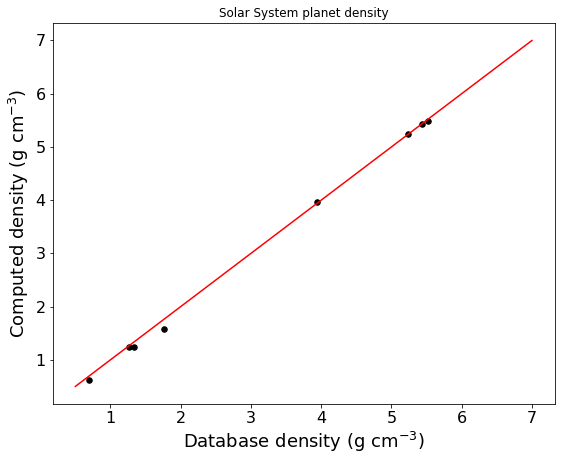

Check the planet density computation
[0.99968496 1.00030968 0.99606266 1.00829923 0.93487509 0.8975821
 0.97997836 0.89974988]


In [6]:
# uncompressed_density core mass fraction (Taylor and McLennan, 2009)
# Earth    3.96       16%
# Venus    3.9        ~12%
# Mars     3.7        ~9%
# Mercury  5.0        ~42%
# Moon     3.27       < 2%

# Venus 0.723 au Mars 1.523 au 
# Venus radius = 6.051 km, Mass diameter =  3389.5 km 
# Venus mass = 4.8675e24 kg, Mars mass =  6.4171e23 kg
# Venus = density 5.243, Mars density =  3.9335 g/cm^3

# Mercury
# mean density = 5.44

# Murchie
# Earth uncompressed density is 4.4 g/cm^3
# Mercury uncompressed density is 5.3 g/cm^3

Earth_radius = 6378. # km
MEarth_gr = 5.97e27 # gr
km_to_cm = 1e5

distance_solar_system_planets = np.array([0.387, 0.7233, 1.0, 1.523, 5.2, 9.5, 19.2, 30.1])
radius_solar_system_planets=np.array([0.3825, 0.9488, 1., 0.53, 11.2, 9.4, 4.0, 3.9])
mass_solar_system_planets=np.array([0.0553, 0.8150, 1.0, 0.107489, 318., 95., 14.5, 17.1])

solar_system_planets=['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter',
                      'Saturn', 'Uranus', 'Neptune']

percent_core_solar_system = [42., 12., 16., 9.]

density_solar_system_planets=np.array([5.43, 5.24, 5.515, 3.9335,
                                       1.33, 0.7, 1.27, 1.76]) # gr/cm^3

volume_ss_planets =(4. * np.pi / 3.) * (radius_solar_system_planets * Earth_radius * km_to_cm)**3

computed_density_solar_system = mass_solar_system_planets * MEarth_gr / volume_ss_planets

xradius = np.linspace(0.01,30,1000) # in Earth radius
volume =(4. * np.pi / 3.) * (xradius * Earth_radius * km_to_cm)**3
mass_rho_planet = []
for rho in density_solar_system_planets:
    mass_rho_planet.append(rho * volume / MEarth_gr) # Earth mass

data_solar_system = pd.DataFrame({'name': solar_system_planets,
                     'distance (au)':distance_solar_system_planets,
                     'radius (EU)':radius_solar_system_planets,
                     'mass (EU)':mass_solar_system_planets,
                     'density (cgs)': density_solar_system_planets})

# uncompressed solid materials density in g /cm^3
# gold 19.3
# silver 10.5
# lead 11.34
# zinc 7.14
# copper 9.0/8.96
# nickel 8.9
# Stony iron 4.35
# Earth radius is determined by the composition and internal pressure
# check Equation of state
#
# Earh upper mantle  720 km   thickness  3.4 g/cm^3
# Earth lower mantle 2.171 km thickness  4.4 g/cm^3
# Earth core         2.259 km,           9.9 g/cm^3
# Earth inner core   1.221 km           12.8 g/cm^3
# uncompressed Earth                     4.4 g/cm^3
density_solids = np.array([12.8, 9.9, 7.87, 4.35, 3.71, 1.0])
solids = ['Earth inner core', 'Earth core', 'Iron metal', 'Stony iron', 'Olivine', 'Water ice']
data_solids = pd.DataFrame({'name':solids, 'density (cgs)': density_solids})

density_iron = density_solids[0]
# mass of pure iron planets in MEarth
mass_iron_planet = (4 / 3 * np.pi) * density_iron * (xradius * Earth_radius * km_to_cm)**3 / MEarth_gr

# The Earth's center has an ultrahigh pressure of 364 GPa and an ultrahigh temperature of 5,500 °C.
# Air at sea level has a pressure of  10,1325 Pa
# 100 m ->  1 MPa
# 1000m ->  10 MPa
nH = 1e23   # cm^-3 average 
mH = 1.67e-24  # gr
density_gas = mH * nH
print(density_gas)
mass_pure_H_planet = (4 / 3 * np.pi) * density_gas * (xradius * Earth_radius*km_to_cm)**3 / MEarth_gr

for rho in density_solids:
    mass_rho_planet.append(rho*volume / MEarth_gr)  #Earth mass

#mass_rho_planet = np.array(mass_rho_planet)

fig = plt.figure(figsize=(9, 7))
ax = plt.subplot(111)
xmin = 0.5
xmax = 7
ymin = 0.5
ymax = 7
ax.plot([xmin, xmax], [ymin, ymax], color='red')
ax.scatter(density_solar_system_planets, computed_density_solar_system, s=30, color='black')
ax.set_ylabel(r'Computed density (g cm$^{-3}$)', fontsize=18)
ax.set_xlabel(r'Database density (g cm$^{-3}$)', fontsize=18)
plt.title('Solar System planet density')
plt.show()
print("Check the planet density computation")
print(computed_density_solar_system / density_solar_system_planets)

### Planet Density $\rho_{p}$

Accoeding to the NASA exoplanet website, for planets for which the archive has both the planetary radius $R_{p}$ and the planetary mass $M_{p}$, but for which the archive does not have a planet density $\rho_{p}$, the density is calculated from the mass and volume of the planet, assuming the planet is a sphere. The explicit functional form is:

$\rho_{p} = 3M_{p} / (4\pi R_{p}^{3})$.

In [7]:
# download the catalogue from exoplanet.eu
exo = pd.read_csv('exoplanet.eu_catalog.csv')
#df.str.startswith('kepler'))
exo = exo[exo['# name'].str.contains('Kepler') == 0] # remove the Kepler planet from this list
exo = exo[exo['mass_error_min'] != 0] # remove the upper limit in mass
exo = exo[exo['mass_error_max'] != 0]
exo_data = exo[['# name','mass','radius']].dropna() # remove the planets with NaN
MJupiter = 318  # in MEarth
RJupiter = 11.2 # in REarth
exo_data['mass'] = exo_data['mass'] * MJupiter # conversion to Earth units
exo_data['radius'] = exo_data['radius'] * RJupiter
y_exo = np.array(exo_data['mass'])
x_exo = np.array(exo_data['radius'])

Earth_radius = 6378. # km
MEarth_gr = 5.97e27  # gr
km_to_cm = 1e5  # 1e5 cm = 1 km
max_mass = 10. # in Jupiter mass
exo_density_all = y_exo / (4 / 3. * np.pi * (x_exo * Earth_radius * km_to_cm)**3) * MEarth_gr

wexo = (y_exo < max_mass * MJupiter)  
wupper=((exo_density_all > density_solids.max()) & (y_exo < max_mass * MJupiter))

exo_density = y_exo[wexo] / (4 / 3. * np.pi * (x_exo[wexo] * Earth_radius * km_to_cm)**3) * MEarth_gr

exo_radius  = x_exo[wexo]  # < 10 MJupiter
exo_mass = y_exo[wexo]

#print exo_data[wupper]

In [8]:
data_solids

,name,density (cgs)
0,Earth inner core,12.80
1,Earth core,9.90
2,Iron metal,7.87
3,Stony iron,4.35
4,Olivine,3.71
5,Water ice,1.00


Solid water ice will have density 1 g/cm3, solid rock will have densities around 3-5 g/cm3, and porous structures will have lower density. The Earth mean density (5.515 g/cm3) is high. Gaseous planets have density of the order of 1, because they have a solid core.

In [9]:
kepler_data

,P_NAME,P_MASS,P_RADIUS,P_DENSITY
1,Kepler-276 c,16.600,2.900,0.680635
2,Kepler-829 b,5.100,2.110,0.542904
4,Kepler-477 b,4.940,2.070,0.556950
38,Kepler-18 d,16.400,6.980,0.048226
62,Kepler-435 b,266.970,22.310,0.024042
...,...,...,...,...
5587,Kepler-1834 b,2.730,1.459,0.879016
5588,Kepler-1869 c,0.330,0.740,0.814364
5589,Kepler-290 d,0.566,0.860,0.889859
5590,Kepler-58 e,3.220,1.610,0.771575


In [10]:
y_kepler= np.array(kepler_data['P_MASS'])
x_kepler = np.array(kepler_data['P_RADIUS'])
exo_density_kepler = y_kepler / (4 / 3. * np.pi * (x_kepler * Earth_radius * km_to_cm)**3) * MEarth_gr  # gr / cm^3
exo_density= np.append(exo_density, exo_density_kepler)
exo_radius= np.append(exo_radius, x_kepler)
exo_mass = np.append(exo_mass, y_kepler)

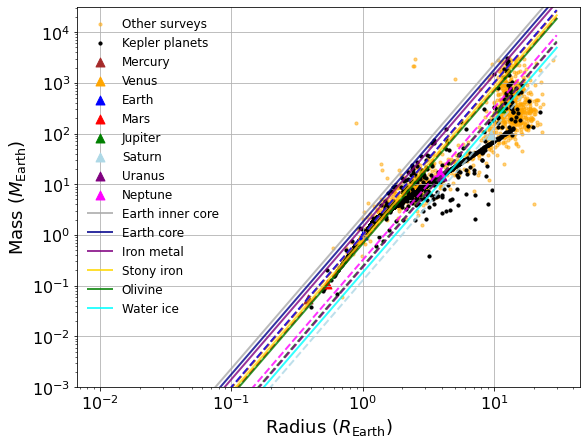

In [11]:
colors = ['brown','orange','blue','red','green','lightblue','purple','magenta']
colors2 = ['darkgray','darkblue','purple','gold','green','cyan']

def plot_mass_radius():
    fig = plt.figure(figsize=(9, 7))
    ax = plt.subplot(111)
    ax.scatter(x_exo[wexo], y_exo[wexo], s=10, label='Other surveys', alpha=0.5, color='orange')
    ax.scatter(x_kepler, y_kepler, s=10, label='Kepler planets', alpha=1.0, color='black')
    #ax.scatter(x_exo[wupper],y_exo[wupper],s=5,
    #label='Other surveys upper limit',alpha=1.0,color='red')
    
    for i, (name, col) in enumerate(zip(solar_system_planets, colors)):
        ax.scatter(x_ssp[i], y_ssp[i],marker='^', s=80,color=col, label=name)
        ax.plot(xradius, mass_rho_planet[i], ls='--', linewidth=2.0, color=col, alpha=0.8)

    for i, (name, col) in enumerate(zip(solids, colors2)):
        ax.plot(xradius, mass_rho_planet[i + len(solar_system_planets)], ls='-', linewidth=2.0,
                color=col, alpha=0.8, label=name)
    
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel(r'Radius ($R_{\rm Earth}$)', fontsize=18)
    ax.set_ylabel(r'Mass ($M_{\rm Earth}$)', fontsize=18)
    #ax.set_xlim(1e-2,5.)
    ax.set_ylim(1e-3, max_mass * MJupiter * 10)
    ax.grid()
    ax.legend()
    plt.show()

x_ssp = radius_solar_system_planets
y_ssp = mass_solar_system_planets
plot_mass_radius()

Compact exoplanets can be much denser than the core of the Earth

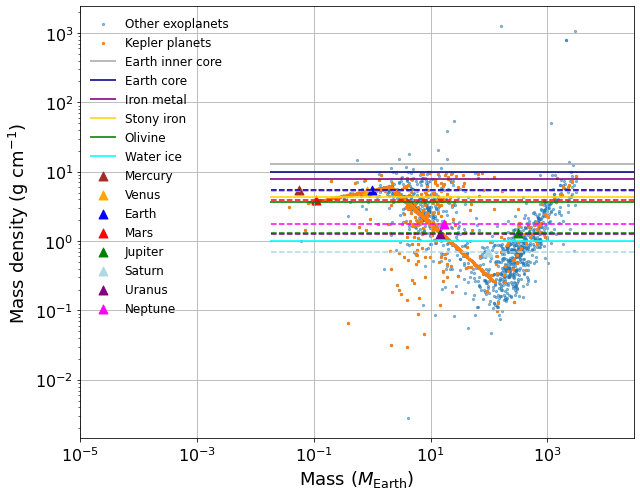

In [12]:
# plot the planet mean density versus the planet mass
y_ssp = density_solar_system_planets
x_ssp = mass_solar_system_planets

fig = plt.figure(figsize=(9, 7))
ax = plt.subplot(111)

ax.scatter(exo_mass, exo_density, s=5, label='Other exoplanets', alpha=0.5)
ax.scatter(y_kepler, exo_density_kepler, s=5, label='Kepler planets')

xmin = exo_mass.min() * 0.5
xmax=3e4

for name,rho,col in zip(solids, density_solids, colors2):
        ax.plot([xmin, xmax],[rho, rho] ,ls='-', linewidth=2.0, color=col, alpha=0.8, label=name)

for i,(name,col) in enumerate(zip(solar_system_planets,colors)):
        ax.scatter(x_ssp[i], y_ssp[i], marker='^', s=80, color=col, label=name)
        ax.plot([xmin,xmax], [y_ssp[i], y_ssp[i]], color=col,ls='--')
        
ax.set_xlim(1e-5,xmax)
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_ylabel(r'Mass density (g cm$^{-1}$)', fontsize=18)
ax.set_xlabel(r'Mass ($M_{\rm Earth}$)', fontsize=18)
ax.legend()
ax.grid()
plt.tight_layout()
plt.savefig("kepler_density_mass.png")
plt.show()

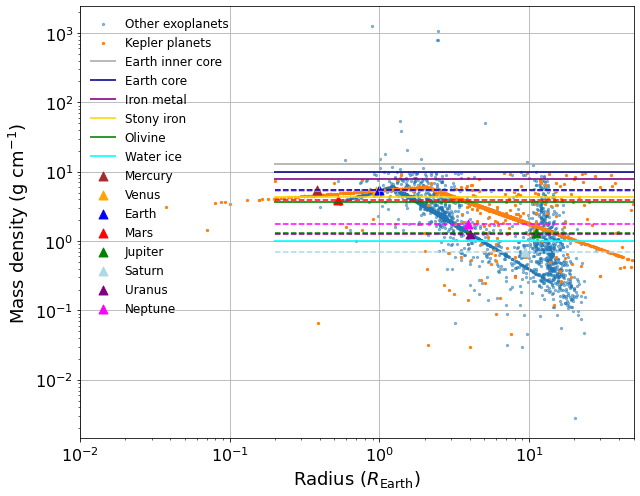

In [13]:
y_ssp = density_solar_system_planets
x_ssp = radius_solar_system_planets

fig = plt.figure(figsize=(9, 7))
ax = plt.subplot(111)
ax.scatter(exo_radius,exo_density, s=5, label='Other exoplanets', alpha=0.5)
ax.scatter(y_kepler, exo_density_kepler, s=5, label='Kepler planets')
xmin = exo_radius.min()*0.5
xmax=50

for name,rho, col in zip(solids, density_solids, colors2):
        ax.plot([xmin, xmax],[rho, rho] ,ls='-', linewidth=2.0, color=col, alpha=0.8, label=name)

for i, (name, col) in enumerate(zip(solar_system_planets, colors)):
        ax.scatter(x_ssp[i], y_ssp[i], marker='^', s=80, color=col, label=name)
        ax.plot([xmin, xmax],[y_ssp[i], y_ssp[i]], color=col, ls='--')
        
ax.set_xlim(0.01, xmax)
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_ylabel(r'Mass density (g cm$^{-1}$)', fontsize=18)
ax.set_xlabel(r'Radius ($R_{\rm Earth}$)', fontsize=18)
ax.legend()
ax.grid()
plt.tight_layout()
plt.savefig("kepler_density_radius.png")
plt.show()

Titan (Ref. Coustenis) 
radius = 2575 km
mass = 1.35e23 kg
surface temperature= 93.6 K
mean density =1.88 g/cm^3

Europa (Ref. Prockter)
radius 1560.8 km
density 3.013 g/cm^3
mass = 4.79955e22

Mercury
density 5440 g/cm^3
mass = 3.301e23 kg
diameter 4880 km

- escape velocity = sqrt(2 M Grav / R) = v
- mv^2/2 > mMG/R
- (1/2) kT > m G (M/R): atom so that there is a factor 1/2
- G cgs = 6.674e-8 dyn/cm^2/g^2
- R(esc) = mGM/kT
- k = 1.38e-16 (cgs)

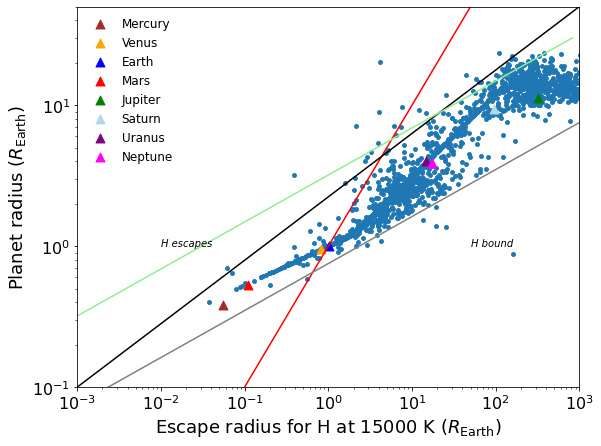

In [14]:
Grav = 6.6725985e-8  # gravitational constant
mH = 1.67e-24  # gr
T = 15000.  # T in Kelvin
kb = 1.380658e-16  # Boltzmann erg/K
Resc = (2. * mH * Grav * (exo_mass * MEarth_gr)) / (kb * T) # cm
Resc = Resc / (Earth_radius * km_to_cm) # in Earth radius

Resc_iron = (2. * mH * Grav * (mass_iron_planet * MEarth_gr)) / (kb * T) # cm
Resc_iron = Resc_iron / (Earth_radius * km_to_cm) # in Earth radius
# xradius

Resc_pure_H = (2. * mH * Grav * (mass_pure_H_planet * MEarth_gr)) / (kb * T)
Resc_pure_H = Resc_pure_H / (Earth_radius * km_to_cm) # in Earth radius

fig = plt.figure(figsize=(9, 7))
ax = plt.subplot(111)
xmin = 0.001
xmax = 1e3
ymin = 0.1
ymax = 50
ax.plot([1e-3, 1e3],[1e-3, 1e3], color='red')
ax.plot([xmin, xmax],[ymin, ymax], color='black')

ax.scatter(Resc, exo_radius, s=15)

y_ssp = radius_solar_system_planets
Resc_ssp = (2. * mH * Grav * (mass_solar_system_planets * MEarth_gr)) / (kb * T) # in cm
x_ssp = Resc_ssp / (Earth_radius * km_to_cm) # in Earth radius
for i, (name, col) in enumerate(zip(solar_system_planets,colors)):
        ax.scatter(x_ssp[i], y_ssp[i], marker='^', s=80, color=col, label=name)

ax.plot(Resc_iron, xradius, color='gray')
ax.plot(Resc_pure_H, xradius, color='lightgreen')
       
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_ylabel(r'Planet radius ($R_{\rm Earth}}$)', fontsize=18)
ax.set_xlabel(r'Escape radius for H at 15000 K ($R_{\rm Earth}$)', fontsize=18)
ax.text(50, 1, 'H bound', style='italic')
ax.text(1e-2, 1, 'H escapes', style='italic')
ax.legend()
plt.show()

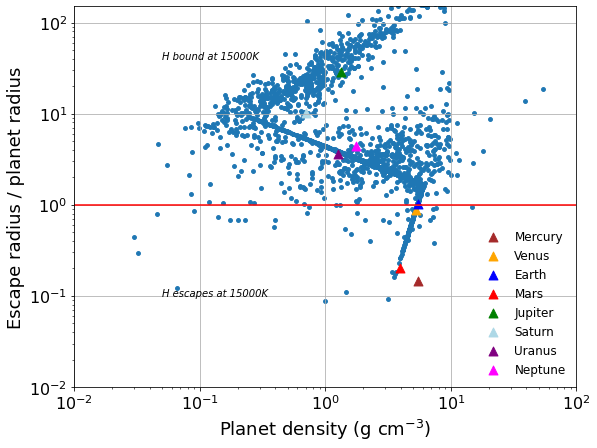

In [15]:
x_ssp = density_solar_system_planets
Resc_ssp = (2. * mH * Grav * (mass_solar_system_planets * MEarth_gr)) / (kb * T) # in cm
y_ssp = (Resc_ssp / (Earth_radius * km_to_cm)) / radius_solar_system_planets

fig = plt.figure(figsize=(9, 7))
ax = plt.subplot(111)
xmin = 0.01
xmax = 1e2
ymin = 0.01
ymax = 150
ax.plot([xmin,xmax],[1, 1], color='red')
ax.scatter(exo_density, Resc/exo_radius, s=15)

for i,(name,col) in enumerate(zip(solar_system_planets, colors)):
        ax.scatter(x_ssp[i], y_ssp[i], marker='^', s=80, color=col, label=name)

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_ylabel(r'Escape radius / planet radius', fontsize=18)
ax.set_xlabel(r'Planet density (g cm$^{-3}$)', fontsize=18)
ax.text(5e-2, 40, 'H bound at 15000K', style='italic')
ax.text(5e-2, 0.1, 'H escapes at 15000K', style='italic')
ax.grid()
ax.legend()
plt.savefig("kepler_escape_density.png")
plt.show()

The data in the exoplanet catalogues do not have distances

In [16]:
# We restrict ourself to the Kepler planets
print(kepler.shape) # 947 confirmed out of 3763 in total
#kepler_data=kepler_data[kepler['P. Confirmed'] == 1] 
# if uncommented we will only choose the confirmed planets

(2639, 118)


In [17]:
Earth_radius = 6378. # km
MEarth_gr = 5.97e27  # gr
km_to_cm  = 1e5      # 1e5 cm = 1 km
distance = kepler['P_DISTANCE']
minHZ = kepler['S_HZ_OPT_MIN']
maxHZ = kepler['S_HZ_OPT_MAX']
mass = kepler['P_MASS']
mass_star = kepler['S_MASS']
radius = kepler['P_RADIUS']
# composition= kepler['P. Composition Class']
# Habitable_class = kepler['P. Habitable Class']
Habitable = kepler['P_HABITABLE']
# atmosphere = kepler['P. Atmosphere Class']
density_Earth = 5.515 # g/cm^3
density = (mass * MEarth_gr) / (4 * np.pi / 3 * (radius * Earth_radius * km_to_cm)**3)
density_kepler = kepler['P_DENSITY'] * density_Earth

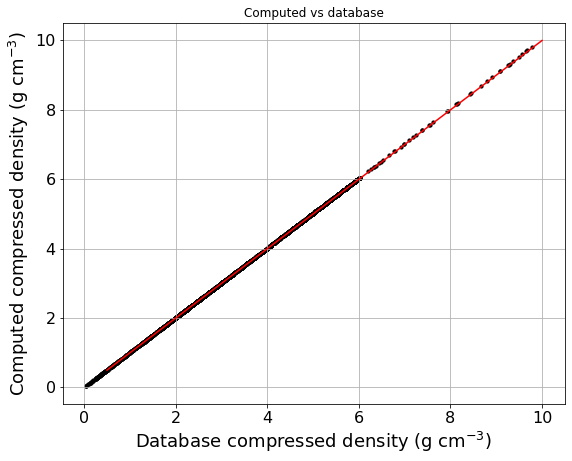

In [18]:
# Plot the comparison between the listed mean density and y computation
fig = plt.figure(figsize=(9, 7))
ax = plt.subplot(111)
xmin = 0.5
xmax = 10
ymin = 0.5
ymax = 10
ax.plot([xmin, xmax],[ymin, ymax], color='red')
ax.scatter(density, density_kepler, s=10, color='black')
ax.set_ylabel(r'Computed compressed density (g cm$^{-3}$)', fontsize=18)
ax.set_xlabel(r'Database compressed density (g cm$^{-3}$)', fontsize=18)
plt.title('Computed vs database')
plt.grid()
plt.show()

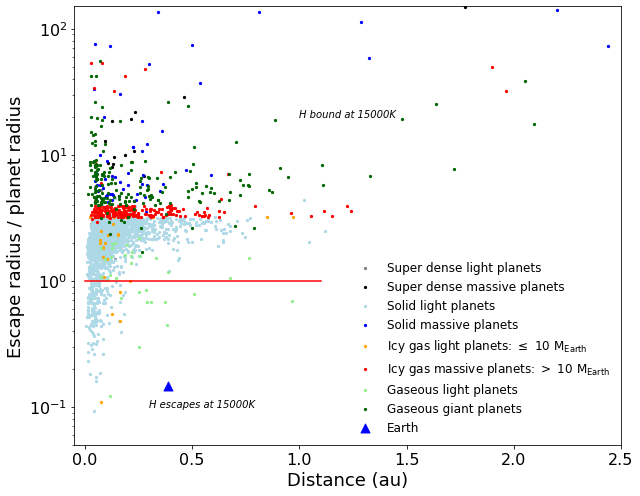

In [19]:
x_ssp = distance_solar_system_planets
Resc_ssp = (2. * mH * Grav * (mass_solar_system_planets * MEarth_gr)) / (kb * T) # in cm
y_ssp = (Resc_ssp / (Earth_radius * km_to_cm)) / radius_solar_system_planets

Resc = (2.* mH * Grav * (mass * MEarth_gr)) / (kb * T) # cm
Resc = Resc / (Earth_radius * km_to_cm) # in Earth radius

fig = plt.figure(figsize=(9, 7))
ax = plt.subplot(111)
xmin = 0.001
xmax = 2
ymin = 0.01
ymax = 150
ax.plot([xmin,1.1],[1,1],color='red')
m_core = 10.
rho_icy = 1.8
rho_gas = 1.2
rho_iron = 7.87 # density_solids[0] # 7.87

w_super_dense_light = ((density_kepler > rho_iron) & (mass <= m_core))
w_super_dense_massive = ((density_kepler > rho_iron) & (mass > m_core))

w_solid_light = ((density_kepler >= rho_icy) & (density_kepler <= rho_iron) 
                 & (mass <= m_core))
w_solid_massive = ((density_kepler >= rho_icy) & (density_kepler <= rho_iron) 
                   & (mass >  m_core))

w_ice_gas_light = (( density_kepler > rho_gas ) & (density_kepler <  rho_icy) 
                   & (mass <= m_core))
w_ice_gas_massive = (( density_kepler > rho_gas ) & (density_kepler <  rho_icy) 
                     & (mass > m_core))

w_gas_light       = ((density_kepler < rho_gas) & (mass <= m_core))
w_gas_massive     = ((density_kepler < rho_gas) & (mass > m_core))

ratio = Resc/radius
labels = [r'Super dense light planets',
          r'Super dense massive planets',
          r'Solid light planets',
          r'Solid massive planets',
          r'Icy gas light planets: $\leq$ 10 M$_{\rm Earth}$',
          r'Icy gas massive planets: $>$ 10 M$_{\rm Earth}$',
          r'Gaseous light planets',
          r'Gaseous giant planets']

psize = 5
ax.scatter(distance[w_super_dense_light], ratio[w_super_dense_light], s=psize,
           color='gray', label=labels[0])

ax.scatter(distance[w_super_dense_massive], ratio[w_super_dense_massive], s=psize,
           color='black', label=labels[1])


ax.scatter(distance[w_solid_light], ratio[w_solid_light], s=psize,
           color='lightblue', label=labels[2])
ax.scatter(distance[w_solid_massive], ratio[w_solid_massive], s=psize,
           color='blue', label=labels[3])

ax.scatter(distance[w_ice_gas_light], ratio[w_ice_gas_light], s=psize,
           color='orange', label=labels[4])
ax.scatter(distance[w_ice_gas_massive], ratio[w_ice_gas_massive], s=psize,
           color='red', label=labels[5])

ax.scatter(distance[w_gas_light], ratio[w_gas_light], s=psize,
           color='lightgreen',label=labels[6])
ax.scatter(distance[w_gas_massive], ratio[w_gas_massive], s=psize,
           color='darkgreen', label=labels[7])

ax.scatter(x_ssp[0], y_ssp[0],marker='^', s=80, color='blue', label='Earth')

#ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(-0.05, 2.5)
ax.set_ylim(0.05, ymax)
ax.set_ylabel(r'Escape radius / planet radius', fontsize=18)
ax.set_xlabel(r'Distance (au)', fontsize=18)
ax.text(1.0,20,'H bound at 15000K', style='italic')
ax.text(0.3,0.1,'H escapes at 15000K', style='italic')
ax.legend()
plt.tight_layout()
plt.savefig("kepler_escape_distance.png")
plt.show()

### Simple approximation to the (Water) ice line given the star mass
- Luminosity of a star ~ Mstar^4
- Teq = 280 K / sqrt(a/1 au) *(Mstar/Msun)
- Tice = 150K
- a(in au) = [(280/150)*(Mstar/Msun)]^2 = 3.48 * (Mstar/Msun)^2

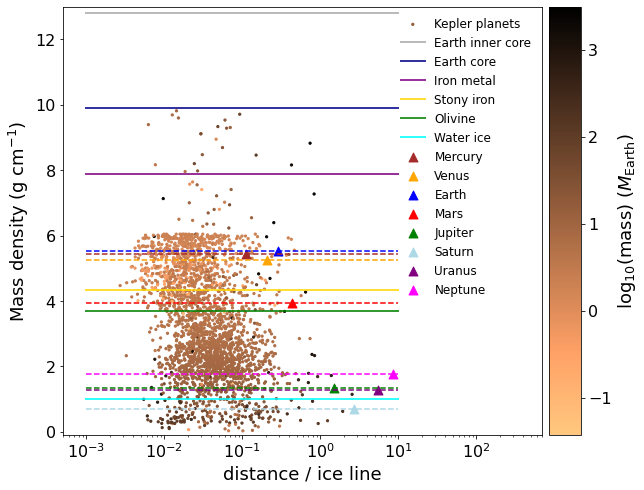

In [20]:
y_ssp = density_solar_system_planets
ice_line_solar_system = 3.48
ice_line_kepler = ice_line_solar_system * mass_star**2

x_ssp = distance_solar_system_planets / ice_line_solar_system

gas = (density_kepler < rho_icy)

fig = plt.figure(figsize=(9, 7))

ax = plt.subplot(111)
# factor 0.85 on the density?
s=ax.scatter(distance / ice_line_kepler, density_kepler,
             s=5, alpha=1, c=np.log10(mass), cmap='copper_r', label='Kepler planets')
ax.set_xlabel(r'distance / ice line', fontsize=18)
ax.set_ylabel(r'Mass density (g cm$^{-1}$)', fontsize=18)

# Retrieve an element of a plot and set properties
for tick in ax.xaxis.get_ticklabels():
    tick.set_fontsize(16)
    tick.set_fontname('DejaVu Sans')
    tick.set_color('black')
#    tick.set_weight('bold')

for tick in ax.yaxis.get_ticklabels():
    tick.set_fontsize(16)
    tick.set_fontname('DejaVu Sans')
    tick.set_color('black')


xmin = 1e-3
xmax = 10.
for name,rho,col in zip(solids, density_solids, colors2):
        ax.plot([xmin,xmax],[rho,rho] , ls='-',linewidth=2.0,
                color=col, alpha=0.8, label=name)

for i,(name,col) in enumerate(zip(solar_system_planets, colors)):
        ax.scatter(x_ssp[i],y_ssp[i], marker='^', s=80,color=col, label=name)
        ax.plot([xmin,xmax],[y_ssp[i], y_ssp[i]], color=col, ls='--')

ax.set_ylim(-0.1, 13)
ax.set_xlim(5e-4, 700)

ax.set_xscale("log")
#ax.set_yscale("log")
ax.legend()
colorbar_ax = fig.add_axes([0.85,0.1,0.05,0.85])
fig.colorbar(s, cax=colorbar_ax,label=(r'$\log_{10}$(mass) ($M_{\rm Earth}}$)'))
fig.subplots_adjust(top=0.95, bottom=0.1, left=0.1, right=0.84,
                        wspace=0.05)
plt.savefig("kepler_density_ice_line.png")
plt.show()

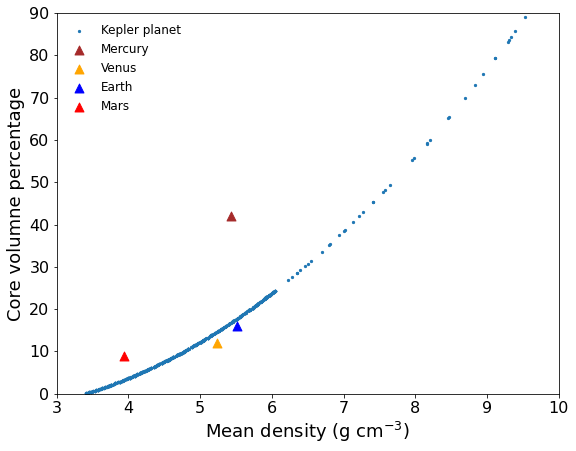

In [21]:
core_density = 9.9 # gcc compressed
mantle_density = 3.4 # gcc
mass_percentage_core = (density_kepler - mantle_density)/(core_density - mantle_density)*100
volume_percentage_core = mass_percentage_core*density_kepler*core_density * 1e-2

w_terrestrial   =  (density_kepler > mantle_density)
w_ss_terrestrial = (density_solar_system_planets > mantle_density)
x_ssp = density_solar_system_planets[w_ss_terrestrial]
y_ssp = (x_ssp - mantle_density)/(core_density - mantle_density)*100

fig = plt.figure(figsize=(9, 7))
ax = plt.subplot(111)
ax.scatter(density_kepler[w_terrestrial],
           volume_percentage_core[w_terrestrial], label='Kepler planet', s=5)
for i,(name,col) in enumerate(zip(solar_system_planets[0:4], colors[0:4])):
    ax.scatter(x_ssp[i],percent_core_solar_system[i], marker='^'
               , s=80, color=col, label=name)
ax.set_xlabel(r'Mean density (g cm$^{-3}$)')
ax.set_ylabel(r'Core volumne percentage')
ax.set_ylim(0., 90)
ax.set_xlim(3, 10)
ax.legend()
plt.savefig("kepler_core_volume_percentage.png")
plt.show()

### Uncompressed density estimates

               name  density (cgs)
0  Earth inner core          12.80
1        Earth core           9.90
2        Iron metal           7.87
3        Stony iron           4.35
4           Olivine           3.71
5         Water ice           1.00


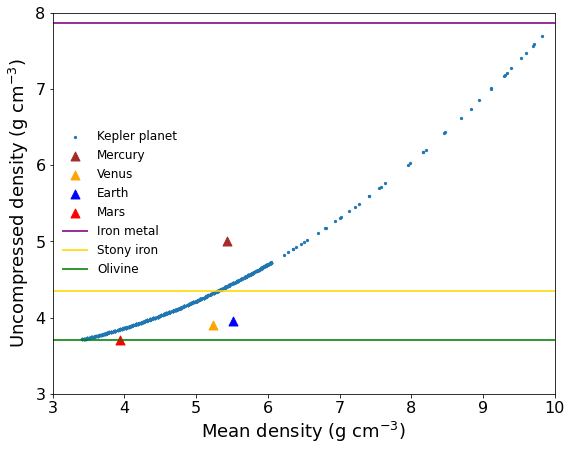

In [22]:
print(data_solids)
w_iron_metal=data_solids['name'] == 'Iron metal'
w_olivine = data_solids['name'] == 'Olivine'
Iron_metal_density = np.array(data_solids['density (cgs)'][w_iron_metal])
Olivine_density = np.array(data_solids['density (cgs)'][w_olivine])
uncompressed_density_kepler = 1e-2 * (volume_percentage_core * Iron_metal_density)
uncompressed_density_kepler = uncompressed_density_kepler + 1e-2 * ((100. -volume_percentage_core) * Olivine_density)

uncompressed_density_solar_system=[5.0, 3.9, 3.96, 3.70]

x_ssp = density_solar_system_planets[w_ss_terrestrial]
y_ssp = uncompressed_density_solar_system

fig = plt.figure(figsize=(9, 7))
ax = plt.subplot(111)
ax.scatter(density_kepler[w_terrestrial],
           uncompressed_density_kepler[w_terrestrial], label='Kepler planet', s=5)
for i, (name, col) in enumerate(zip(solar_system_planets[0:4], colors[0:4])):
    ax.scatter(x_ssp[i],y_ssp[i],marker='^'
               ,s=80,color=col, label=name)
    
xmin = 3
xmax = 10.
for name, rho,col in zip(solids[2:5], density_solids[2:5], colors2[2:5]):
        ax.plot([xmin, xmax],[rho,rho] ,ls='-', linewidth=2.0, color=col, alpha=0.8, label=name)

ax.set_xlabel(r'Mean density (g cm$^{-3}$)')
ax.set_ylabel(r'Uncompressed density (g cm$^{-3}$)')
ax.set_ylim(3,8)
ax.set_xlim(xmin, xmax)
ax.legend()
plt.savefig("kepler_uncompressed_vs_compressed_density.png")
plt.show()

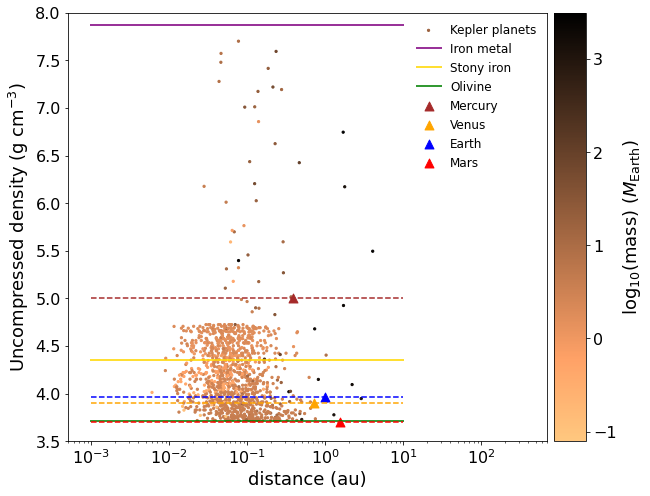

In [23]:
x_ssp = distance_solar_system_planets[w_ss_terrestrial]
y_ssp = uncompressed_density_solar_system

fig = plt.figure(figsize=(9, 7))
ax = plt.subplot(111)
s=ax.scatter(distance[w_terrestrial]
             ,uncompressed_density_kepler[w_terrestrial],
             s=5, alpha=1, c=np.log10(mass[w_terrestrial]),
             cmap='copper_r', label='Kepler planets')
ax.set_ylim(3.5, 8)
ax.set_xlim(5e-4, 700)

xmin = 1e-3
xmax = 10.
for name,rho,col in zip(solids[2:5], density_solids[2:5], colors2[2:5]):
        ax.plot([xmin, xmax], [rho, rho] ,ls='-', linewidth=2.0,
                color=col, alpha=0.8, label=name)

for i,(name,col) in enumerate(zip(solar_system_planets[0:4], colors[0:4])):
    ax.scatter(x_ssp[i], y_ssp[i],marker='^', s=80, color=col, label=name)
    ax.plot([xmin, xmax], [y_ssp[i], y_ssp[i]], color=col, ls='--')

ax.set_xlabel(r'distance (au)', fontsize=18)
ax.set_ylabel(r'Uncompressed density (g cm$^{-3}$)')

ax.set_xscale("log")
#ax.set_yscale("log")
ax.legend()
colorbar_ax = fig.add_axes([0.85,0.1,0.05,0.85])
fig.colorbar(s, cax=colorbar_ax, label=(r'$\log_{10}$(mass) ($M_{\rm Earth}}$)'))
fig.subplots_adjust(top=0.95, bottom=0.1, left=0.1, right=0.84,
                    wspace=0.05)
plt.savefig("kepler_uncompressed_vs_distance.png")
plt.show()

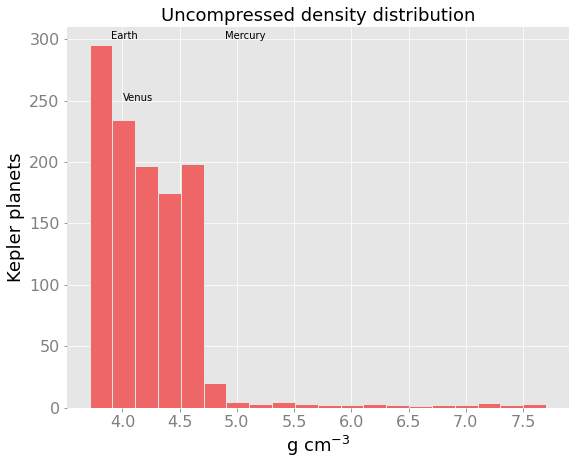

In [24]:
w_stony=data_solids['name'] == 'stony'
stony_density = np.array(data_solids['density (cgs)'][w_stony])
x = uncompressed_density_kepler[w_terrestrial]

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111)

# use a gray background
ax.set_facecolor('#E6E6E6') #
ax.set_axisbelow(True)

# draw solid white grid lines
plt.grid(color='w', linestyle='solid')

# hide axis spines
for spine in ax.spines.values():
    spine.set_visible(False)
    
# hide top and right ticks
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# lighten ticks and labels
ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')
    
# control face and edge color of histogram
ax.hist(x, edgecolor='#E6E6E6', color='#EE6666',bins=20);
ax.set_title(r'Uncompressed density distribution',size=18)
ax.set_xlabel(r'g cm$^{-3}$')
ax.set_ylabel(r'Kepler planets')
ax.text(3.9,300,'Earth')
ax.text(4.0,250,'Venus')
ax.text(4.9,300,'Mercury')
plt.savefig("kepler_uncompressed_density_distribution.png")
plt.show()

- S-type asteroids are on average more dense that C-types (grey) 
- Average S-type: 2.7 g/cm3;
- Average C-type: 1.3 g/cm3; 
- Average X-type: 1.85 g/cm3 

From:
- Carry, B., (2012). Density of asteroids. Planetary and Space Science, 73(1), pp.98- 118.
- Murdoch, N. (2016). Physical properties of the surface and sub-surface of asteroids. ASIME 2016: Asteroid Intersections with Mine Engineering, Luxembourg. September 21-22, 2016.
- Scheeres, D.J., Britt, D., Carry, B. and Holsapple, K.A., (2015). Asteroid interiors and morphology. Asteroids IV, pp.745-766.

18 (18,)


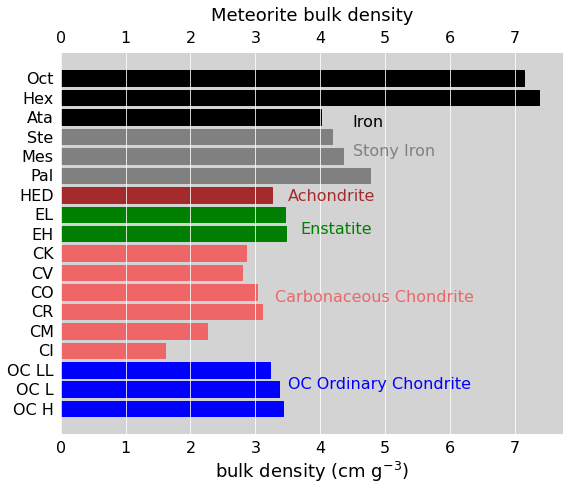

In [25]:
# Data source Carray 2012 Table 2 and and original reference
# OC  Ordinary chondrites
# CC  Carbonaceous Chondrites
# E   Enstatites
# HED Achondrites
# Pal, Mes, Ste  Stony-Iron
# Ata, Hex, Oct  Iron
meteorites=['OC H','OC L','OC LL',
            'CI','CM',
            'CR','CO',
            'CV','CK'
            ,'EH','EL','HED','Pal','Mes','Ste','Ata','Hex','Oct']
meteorites_density=np.array([3.42,3.36,3.22,1.6,2.25,3.1,3.03,2.79,
                    2.85,3.47,3.46,3.25,4.76,4.35,4.18,4.01,7.37,7.14])
print(len(meteorites),meteorites_density.shape)
mcolors = ['blue','blue','blue','#EE6666',
           '#EE6666','#EE6666','#EE6666','#EE6666','#EE6666',
          'green','green','brown','gray','gray','gray',
          'black','black','black']

default = {'axes.spines.bottom' : True,
                     'axes.spines.top' : True,
                     'axes.spines.left' : True,
                     'axes.spines.right' : True,
                     'axes.facecolor': 'w',
                     'xtick.top': True,
                     'xtick.bottom': True,
                     'ytick.left': True,
                     'ytick.right': True,
                     'xtick.labeltop': False}

mpl.rcParams.update({'axes.spines.bottom' : False,
                     'axes.spines.top' : False,
                     'axes.spines.left' : False,
                     'axes.spines.right' : False,
                     'axes.facecolor': 'lightgray',
                     'xtick.top': False,
                     'xtick.bottom': False,
                     'ytick.left': False,
                     'ytick.right': False,
                     'xtick.labeltop': True})

plt.figure(figsize=(9,7))
ind = np.arange(0,18,1)
plt.barh(ind,meteorites_density,edgecolor=mcolors, color=mcolors)
plt.yticks(ind,meteorites)
plt.grid(color='w', linestyle='solid',which='major',axis='x')
lsize = 16
plt.text(3.5,1,'OC Ordinary Chondrite',color='blue',size=lsize)
plt.text(3.3,5.5,'Carbonaceous Chondrite',color='#EE6666',size=lsize)
plt.text(3.7,9,'Enstatite',color='green',size=lsize)
plt.text(3.5,10.7,'Achondrite',color='brown',size=lsize)
plt.text(4.5,13,'Stony Iron',color='gray',size=lsize)
plt.text(4.5,14.5,'Iron',color='black',size=lsize)
plt.xlabel(r'bulk density (cm g$^{-3}$)')
plt.title(r'Meteorite bulk density',size=18, pad=32) # pad to allow space above the labels
plt.show()
mpl.rcParams.update(default)


In [26]:
kepler.columns.values

array(['P_NAME', 'P_DETECTION', 'P_DISCOVERY_FACILITY', 'P_YEAR',
       'P_UPDATE', 'P_MASS', 'P_MASS_ERROR_MIN', 'P_MASS_ERROR_MAX',
       'P_MASS_LIMIT', 'P_MASS_ORIGIN', 'P_RADIUS', 'P_RADIUS_ERROR_MIN',
       'P_RADIUS_ERROR_MAX', 'P_RADIUS_LIMIT', 'P_PERIOD',
       'P_PERIOD_ERROR_MIN', 'P_PERIOD_ERROR_MAX', 'P_PERIOD_LIMIT',
       'P_SEMI_MAJOR_AXIS', 'P_SEMI_MAJOR_AXIS_ERROR_MIN',
       'P_SEMI_MAJOR_AXIS_ERROR_MAX', 'P_SEMI_MAJOR_AXIS_LIMIT',
       'P_ECCENTRICITY', 'P_ECCENTRICITY_ERROR_MIN',
       'P_ECCENTRICITY_ERROR_MAX', 'P_ECCENTRICITY_LIMIT',
       'P_INCLINATION', 'P_INCLINATION_ERROR_MIN',
       'P_INCLINATION_ERROR_MAX', 'P_INCLINATION_LIMIT', 'P_OMEGA',
       'P_OMEGA_ERROR_MIN', 'P_OMEGA_ERROR_MAX', 'P_OMEGA_LIMIT',
       'S_NAME', 'S_NAME_HD', 'S_NAME_HIP', 'S_TYPE', 'S_RA', 'S_DEC',
       'S_RA_STR', 'S_DEC_STR', 'S_MAG', 'S_MAG_ERROR_MIN',
       'S_MAG_ERROR_MAX', 'S_DISTANCE', 'S_DISTANCE_ERROR_MIN',
       'S_DISTANCE_ERROR_MAX', 'S_TEMPERATURE',

There are different possible Habitable zone computations. see  Kopparapu et al.(2013), Astrophysical Journal, 765, 131 

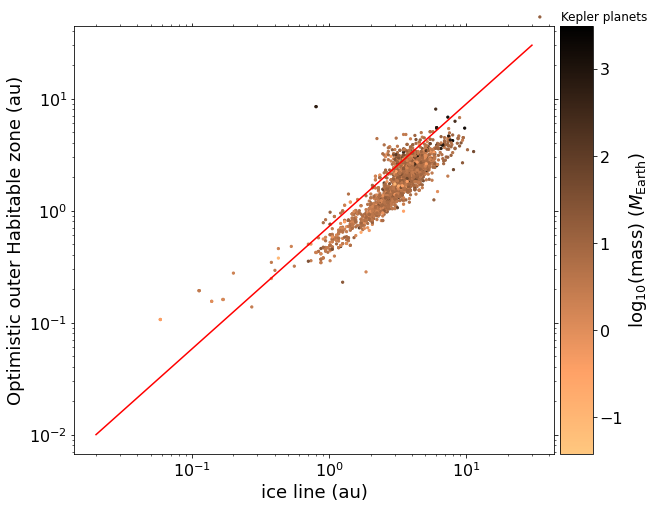

In [27]:
maxHabZone=kepler['S_HZ_OPT_MAX']  # optimistic maximum radius for the Habotable Zone

fig = plt.figure(figsize=(9,7))
ax = plt.subplot(111)
# factor 0.85 on the density?
s=ax.scatter(ice_line_kepler, maxHabZone,
             s=5, alpha=1, c=np.log10(mass), cmap='copper_r', label='Kepler planets')
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel(r'ice line (au)', fontsize=18)
xmin = 0.02
xmax = 30
xmin = 0.02
ymax = 30
ax.plot([xmin, xmax], [ymin, ymax], color='red')
ax.set_ylabel(r'Optimistic outer Habitable zone (au)', fontsize=18)
colorbar_ax = fig.add_axes([0.85,0.1,0.05,0.85])
fig.colorbar(s, cax=colorbar_ax, label=(r'$\log_{10}$(mass) ($M_{\rm Earth}}$)'))
fig.subplots_adjust(top=0.95, bottom=0.1, left=0.1, right=0.84,
                    wspace=0.05)
fig.legend()
plt.show()

The optimistic outer habitable zone is closer than the ice line in the planetary systems.

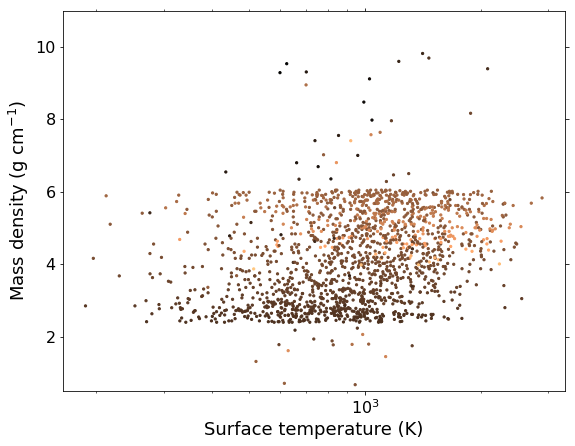

In [28]:
Teq = kepler['P_TEMP_EQUIL']
Ts = kepler['P_TEMP_SURF']
fig = plt.figure(figsize=(9,7))

ax = plt.subplot(111)
# factor 0.85 on the density? because of compressed matter at high pressure
s=ax.scatter(Ts,density_kepler,
             s=5,alpha=1,c=np.log10(mass),cmap='copper_r',label='Kepler planets')
ax.set_ylim(0.5,11)
ax.set_xlabel(r'Surface temperature (K)', fontsize=18)
ax.set_ylabel(r'Mass density (g cm$^{-1}$)', fontsize=18)
ax.set_xscale("log")

plt.show()

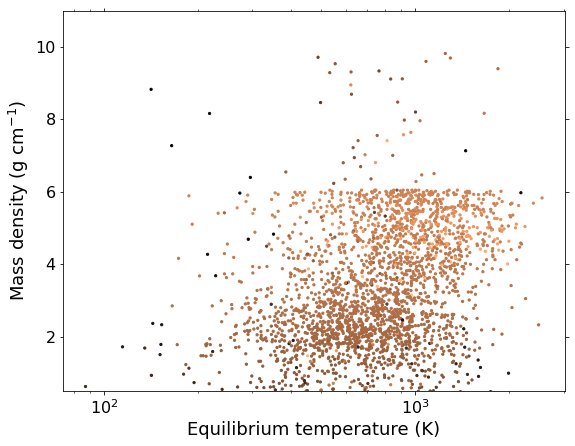

In [29]:
fig = plt.figure(figsize=(9,7))
ax = plt.subplot(111)
# factor 0.85 on the density?
s = ax.scatter(Teq,density_kepler,
               s=5,alpha=1,c=np.log10(mass),cmap='copper_r',label='Kepler planets')
ax.set_ylim(0.5,11)
ax.set_xlabel(r'Equilibrium temperature (K)', fontsize=18)
ax.set_ylabel(r'Mass density (g cm$^{-1}$)', fontsize=18)
ax.set_xscale("log")
plt.show()

In [30]:
kepler.columns[kepler.columns.str.startswith('P')]

Index(['P_NAME', 'P_DETECTION', 'P_DISCOVERY_FACILITY', 'P_YEAR', 'P_UPDATE',
       'P_MASS', 'P_MASS_ERROR_MIN', 'P_MASS_ERROR_MAX', 'P_MASS_LIMIT',
       'P_MASS_ORIGIN', 'P_RADIUS', 'P_RADIUS_ERROR_MIN', 'P_RADIUS_ERROR_MAX',
       'P_RADIUS_LIMIT', 'P_PERIOD', 'P_PERIOD_ERROR_MIN',
       'P_PERIOD_ERROR_MAX', 'P_PERIOD_LIMIT', 'P_SEMI_MAJOR_AXIS',
       'P_SEMI_MAJOR_AXIS_ERROR_MIN', 'P_SEMI_MAJOR_AXIS_ERROR_MAX',
       'P_SEMI_MAJOR_AXIS_LIMIT', 'P_ECCENTRICITY', 'P_ECCENTRICITY_ERROR_MIN',
       'P_ECCENTRICITY_ERROR_MAX', 'P_ECCENTRICITY_LIMIT', 'P_INCLINATION',
       'P_INCLINATION_ERROR_MIN', 'P_INCLINATION_ERROR_MAX',
       'P_INCLINATION_LIMIT', 'P_OMEGA', 'P_OMEGA_ERROR_MIN',
       'P_OMEGA_ERROR_MAX', 'P_OMEGA_LIMIT', 'P_ESCAPE', 'P_POTENTIAL',
       'P_GRAVITY', 'P_DENSITY', 'P_HILL_SPHERE', 'P_DISTANCE', 'P_PERIASTRON',
       'P_APASTRON', 'P_DISTANCE_EFF', 'P_FLUX', 'P_FLUX_MIN', 'P_FLUX_MAX',
       'P_TEMP_EQUIL', 'P_TEMP_EQUIL_MIN', 'P_TEMP_EQUIL_MAX', 'P

In [31]:
set(kepler['P_TYPE'])

{'Jovian', 'Miniterran', 'Neptunian', 'Subterran', 'Superterran', 'Terran'}

In [32]:
kepler.columns[kepler.columns.str.startswith('S')]

Index(['S_NAME', 'S_NAME_HD', 'S_NAME_HIP', 'S_TYPE', 'S_RA', 'S_DEC',
       'S_RA_STR', 'S_DEC_STR', 'S_MAG', 'S_MAG_ERROR_MIN', 'S_MAG_ERROR_MAX',
       'S_DISTANCE', 'S_DISTANCE_ERROR_MIN', 'S_DISTANCE_ERROR_MAX',
       'S_TEMPERATURE', 'S_TEMPERATURE_ERROR_MIN', 'S_TEMPERATURE_ERROR_MAX',
       'S_TEMPERATURE_LIMIT', 'S_MASS', 'S_MASS_ERROR_MIN', 'S_MASS_ERROR_MAX',
       'S_MASS_LIMIT', 'S_RADIUS', 'S_RADIUS_ERROR_MIN', 'S_RADIUS_ERROR_MAX',
       'S_RADIUS_LIMIT', 'S_METALLICITY', 'S_METALLICITY_ERROR_MIN',
       'S_METALLICITY_ERROR_MAX', 'S_METALLICITY_LIMIT', 'S_AGE',
       'S_AGE_ERROR_MIN', 'S_AGE_ERROR_MAX', 'S_AGE_LIMIT', 'S_LOG_LUM',
       'S_LOG_LUM_ERROR_MIN', 'S_LOG_LUM_ERROR_MAX', 'S_LOG_LUM_LIMIT',
       'S_LOG_G', 'S_LOG_G_ERROR_MIN', 'S_LOG_G_ERROR_MAX', 'S_LOG_G_LIMIT',
       'S_TYPE_TEMP', 'S_RA_TXT', 'S_DEC_TXT', 'S_LUMINOSITY', 'S_HZ_OPT_MIN',
       'S_HZ_OPT_MAX', 'S_HZ_CON_MIN', 'S_HZ_CON_MAX', 'S_HZ_CON0_MIN',
       'S_HZ_CON0_MAX', 'S_HZ_CON1_M

In [33]:
data_clf = kepler[['P_MASS', 'P_RADIUS', 'P_DENSITY']].dropna()
X = data_clf[['P_MASS', 'P_RADIUS']]
# we select planets with density higher than 3 g/cm^3 (g cc)
y = (data_clf['P_DENSITY'] * density_Earth > 3.0).astype(int)

In [34]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,random_state=2018)

In [35]:
# test if a neural network can find the density criterion to classify the type of planets
clf = MLPClassifier(hidden_layer_sizes=(100,100),early_stopping=True)
clf.fit(X_train, y_train)
NN_train_pred = clf.predict(X_train)
NN_train_score = clf.score(X_train, y_train)
NN_test_score = clf.score(X_test, y_test)
print(NN_train_score,NN_test_score)

0.949786830885836 0.9375


In [36]:
# the task is very easy indeed
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(15,weights='uniform')
clf.fit(X_train, y_train)
kNN_train_pred = clf.predict(X_train)
kNN_train_score = clf.score(X_train, y_train)
kNN_test_score = clf.score(X_test, y_test)
print(kNN_train_score,kNN_test_score)

0.969682614874467 0.9696969696969697


In [37]:
planet_type = list(set(kepler['P_TYPE']))
print('Type classification of exoplanets')
print(planet_type)

Type classification of exoplanets
['Neptunian', 'Miniterran', 'Terran', 'Jovian', 'Superterran', 'Subterran']


### What are the criteria used to classified thee type of a planets?

In [38]:
# Classification of the planet atmosphere type using the planets mass, radius, 
# distance from the central star, and the stellar luminosity
# type can be : ['Subterran', 'Miniterran', 'Superterran', 'Jovian', 'Terran', 'Neptunian']

# remove NaN
data_clf = kepler[['P_MASS',
                  'P_RADIUS',
                  'P_DISTANCE',
                  'S_TEMPERATURE',
                  'S_LOG_LUM',
                  'S_METALLICITY',
                  'P_TYPE']].dropna()

# encoding the atmosphere classes
planet_type = list(set(kepler['P_TYPE']))

p_type = np.empty(len(data_clf))
for i, pt in enumerate(planet_type):
    w = np.where(data_clf["P_TYPE"]==pt)
    p_type[w] = i
data_clf["P_TYPE"] = p_type
data_clf.head()

,P_MASS,P_RADIUS,P_DISTANCE,S_TEMPERATURE,S_LOG_LUM,S_METALLICITY,P_TYPE
1,16.60,2.90,0.199400,5779.0,-0.089,0.02,0.0
2,5.10,2.11,0.067800,5698.0,0.040,0.03,4.0
4,4.94,2.07,0.091100,5240.0,-0.372,-0.04,4.0
38,16.40,6.98,0.117200,5345.0,-0.031,0.19,0.0
62,266.97,22.31,0.095416,6161.0,1.129,-0.18,3.0


In [39]:
X = data_clf.drop(columns='P_TYPE')
y = data_clf['P_TYPE']
X_ = np.array(X)
y = np.array(y).astype(int)

# standard scaling of the data
from sklearn.preprocessing import StandardScaler,MinMaxScaler
std_scaler = StandardScaler()
std_scaler.fit(X)
Xs = std_scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(Xs, y, 
                                                    test_size=0.2,random_state=2018)

# K-nearest neighbors classifier
clf=KNeighborsClassifier(15, weights='distance') # better than uniform
clf.fit(X_train, y_train)
kNN_train_pred = clf.predict(X_train)
kNN_train_score = clf.score(X_train, y_train)
kNN_test_score = clf.score(X_test, y_test)
print(kNN_train_score, kNN_test_score)

1.0 0.8503787878787878


In [40]:
# XGBoost 5-fold cross-validation with early-stopping
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

# help("xgboost.sklearn.XGBClassifier")
def XGBclassify(n_splits=4, max_depth=5):
    
    train_score = []
    valid_score  = []
    test_score  = []
        
    kfold  = StratifiedKFold(n_splits=n_splits, random_state=2018,shuffle=True)
    rnd = 1211
    
    clf_XGB = XGBClassifier(n_estimators = 100, early_stopping_rounds=50,
                            max_depth=max_depth,objective='multi:softmax',
                            seed=rnd,learning_rate=0.1,booster='gbtree')
    
    for (t,v) in kfold.split(X_train, y_train):
        
        clf_XGB.fit(X_train[t], y_train[t], 
                    eval_set=[(X_train[v], y_train[v])], verbose=False)
        train_score.append(accuracy_score(y_train[t], clf_XGB.predict(X_train[t])))
        valid_score.append(accuracy_score(y_train[v], clf_XGB.predict(X_train[v])))
        test_score.append(accuracy_score(y_test, clf_XGB.predict(X_test)))
        
    train_score  = np.array(train_score)
    valid_score  = np.array(valid_score)
    test_score   = np.array(test_score)
    
    return train_score, valid_score, test_score, clf_XGB.feature_importances_

train_score, valid_score, test_score, fimport = XGBclassify()
print('scores')
print('Train:', train_score.mean())
print('Validation:', valid_score.mean())
print('Test:', test_score.mean())

scores
Train: 1.0
Validation: 0.9900532243689264
Test: 0.9891098484848484


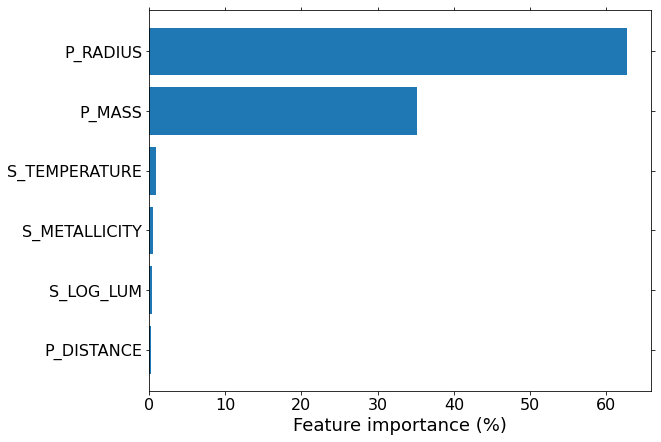

In [41]:
# Plot feature importance
importance = pd.Series(fimport*100.,index=list(X))
importance = importance.sort_values(ascending=True) # convert the xgboost output as a serie
ind = np.arange(0, X.shape[1], 1)
plt.figure(figsize=(9,7))
plt.barh(ind, importance)
plt.yticks(ind, importance.index)
plt.xlabel('Feature importance (%)')
plt.show()

In [42]:
# help("sklearn.neural_network.MLPClassifier")
clf = MLPClassifier(solver='adam', hidden_layer_sizes=(50, 150, 50), early_stopping=True)
clf.fit(X_train, y_train)
NN_train_pred = clf.predict(X_train)
NN_train_score = clf.score(X_train, y_train)
NN_test_score = clf.score(X_test, y_test)
print(NN_train_score,NN_test_score)

0.9573661771672193 0.9488636363636364


In [43]:
from LVQClassifier import *
clf=LVQClassifier(n_components=20,alpha=0.3,epochs=10,initial_state='Uniform',LVQ2=True)
clf.fit(X_train, y_train)
LVQ_train_pred = clf.predict(X_train)
LVQ_train_score = clf.score(X_train, y_train)
LVQ_test_score = clf.score(X_test, y_test)
print(LVQ_train_score,LVQ_test_score)

0.720037896731407 0.7007575757575758


### Classification on the habitability

In [44]:
from astroML.utils import completeness_contamination
from sklearn import metrics

def comp_cont(y_prob):
    thresholds = np.linspace(0, 1, 1001)[:-1]
    comp = np.zeros_like(thresholds)
    cont = np.zeros_like(thresholds)
    for i, t in enumerate(thresholds):
        pred = (y_prob >= t)
        comp[i], cont[i] = completeness_contamination(pred, y_test)
    return comp, cont 

In [45]:
def plot_completeness_efficiency(title):
    comp, cont = comp_cont(y_prob)
    plt.plot(1 - cont, comp)
    plt.xlabel('Efficiency')
    plt.ylabel('Completeness')
    plt.title(title)
    plt.show()

In [46]:
from sklearn.metrics import (accuracy_score,brier_score_loss, 
                             precision_score, 
                             recall_score, f1_score)
def scoring(clf, X_train, y_train, X_test, y_test, X_solar_system, y_solar_system, fit=True):
    if(fit == True):
        clf.fit(X_train, y_train)
        
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:, 1] 
    
    solar_system_pred = clf.predict(X_solar_system)
    solar_system_prob = clf.predict_proba(X_solar_system)[:, 1] 
    
    brier = brier_score_loss(y_test, y_prob, pos_label=y.max())
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    solar_system_brier = brier_score_loss(y_solar_system, 
                                          solar_system_prob, pos_label=y.max())
    solar_system_precision = precision_score(y_solar_system, 
                                             solar_system_pred)
    solar_system_recall = recall_score(y_solar_system, solar_system_pred)

    train_score = clf.score(X_train, y_train)
    test_score  = clf.score(X_test, y_test)
    solar_system_score = clf.score(X_solar_system, y_solar_system)
    
    print("\tscore (train): %1.3f" % train_score)
    print("\tscore (test): %1.3f" % test_score)
    print("\tscore (solar system): %1.3f" % solar_system_score)
    print(solar_system_prob)
    print("Test")
    print("\tBrier: %1.3f" % brier)
    print("\tPrecision (Efficiency): %1.3f" % precision) 
    print("\tRecall (Completeness): %1.3f" % recall) 
    print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))
    print("Solar System")
    print("\tBrier: %1.3f" % solar_system_brier)
    print("\tPrecision (Efficiency): %1.3f" % solar_system_precision) 
    print("\tRecall (Completeness): %1.3f" % solar_system_recall) 
    print("\tF1: %1.3f\n" % f1_score(y_solar_system, solar_system_pred))
    print()
    return y_pred, y_prob

In [47]:
def plot_confusion():
    cm = confusion_matrix(y_test, y_pred)
    labels = ['Not Habitable','Habitable']
    plt.figure(figsize=(7,7))
    plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
    plt.title('Confusion matrix', size = 16)
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, labels, rotation=45, size = 12)
    plt.yticks(tick_marks, labels, size = 12)
    plt.tight_layout()
    plt.ylabel('Actual label', size = 16)
    plt.xlabel('Predicted label', size = 16)
    width, height = cm.shape
    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x),
                     horizontalalignment='center',
                     verticalalignment='center',fontsize=18)
    plt.colorbar()
    plt.show()

In [48]:
kepler.columns[kepler.columns.str.startswith('P')]

Index(['P_NAME', 'P_DETECTION', 'P_DISCOVERY_FACILITY', 'P_YEAR', 'P_UPDATE',
       'P_MASS', 'P_MASS_ERROR_MIN', 'P_MASS_ERROR_MAX', 'P_MASS_LIMIT',
       'P_MASS_ORIGIN', 'P_RADIUS', 'P_RADIUS_ERROR_MIN', 'P_RADIUS_ERROR_MAX',
       'P_RADIUS_LIMIT', 'P_PERIOD', 'P_PERIOD_ERROR_MIN',
       'P_PERIOD_ERROR_MAX', 'P_PERIOD_LIMIT', 'P_SEMI_MAJOR_AXIS',
       'P_SEMI_MAJOR_AXIS_ERROR_MIN', 'P_SEMI_MAJOR_AXIS_ERROR_MAX',
       'P_SEMI_MAJOR_AXIS_LIMIT', 'P_ECCENTRICITY', 'P_ECCENTRICITY_ERROR_MIN',
       'P_ECCENTRICITY_ERROR_MAX', 'P_ECCENTRICITY_LIMIT', 'P_INCLINATION',
       'P_INCLINATION_ERROR_MIN', 'P_INCLINATION_ERROR_MAX',
       'P_INCLINATION_LIMIT', 'P_OMEGA', 'P_OMEGA_ERROR_MIN',
       'P_OMEGA_ERROR_MAX', 'P_OMEGA_LIMIT', 'P_ESCAPE', 'P_POTENTIAL',
       'P_GRAVITY', 'P_DENSITY', 'P_HILL_SPHERE', 'P_DISTANCE', 'P_PERIASTRON',
       'P_APASTRON', 'P_DISTANCE_EFF', 'P_FLUX', 'P_FLUX_MIN', 'P_FLUX_MAX',
       'P_TEMP_EQUIL', 'P_TEMP_EQUIL_MIN', 'P_TEMP_EQUIL_MAX', 'P

In [49]:
data_clf=kepler[['P_MASS',
                 'P_RADIUS',
                 'P_FLUX',
                 'P_HABZONE_OPT']].dropna()

data_clf.head()
X = data_clf.drop(columns='P_HABZONE_OPT')

X = np.array(X).astype(float)
y = data_clf['P_HABZONE_OPT']
y = np.array(y).astype(int)
print('classes:', np.unique(y_train))

solar_flux_solar_system_planets = 1. / distance_solar_system_planets **2  # relative to the Earth
X_solar_system = np.dstack((mass_solar_system_planets
                            ,radius_solar_system_planets
                            ,solar_flux_solar_system_planets)).reshape(8, 3)
y_solar_system = np.array([0, 0, 1, 1, 0, 0, 0, 0])

# standard scaling of the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
std_scaler = StandardScaler()
std_scaler.fit(X)
Xs = std_scaler.transform(X)
Xs_solar_system = std_scaler.transform(X_solar_system)
X_train, X_test, y_train, y_test = train_test_split(Xs, y, 
                                                    test_size=0.2,random_state=2018)

classes: [0 1 2 3 4 5]


In [50]:
# K-nearest neighbors classifier
clf=KNeighborsClassifier(15,weights='distance')
y_pred, y_prob = scoring(clf, X_train, y_train, X_test, y_test, Xs_solar_system, y_solar_system)

	score (train): 1.000
	score (test): 0.970
	score (solar system): 0.750
[0.         0.06888774 0.10243873 0.         0.17212074 0.15520459
 0.04198172 0.14633745]
Test
	Brier: 0.027
	Precision (Efficiency): 0.500
	Recall (Completeness): 0.062
	F1: 0.111

Solar System
	Brier: 0.236
	Precision (Efficiency): 0.000
	Recall (Completeness): 0.000
	F1: 0.000




/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


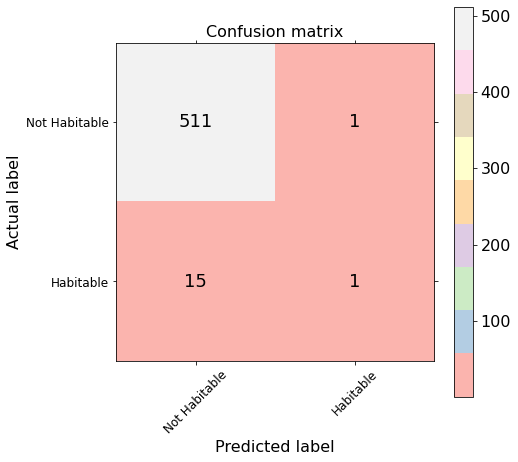

In [51]:
# Plot the confusion matrix
plot_confusion()

In [52]:
# XGBoost
rnd = 2018
clf_XGB = XGBClassifier(n_estimators = 100,
                            max_depth=5,objective='binary:logistic',
                            seed=rnd,learning_rate=0.1,booster='gbtree')        
clf_XGB.fit(X_train,y_train, early_stopping_rounds=50, 
                    eval_set=[(X_test,y_test)], verbose=False)

/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [53]:
y_pred, y_prob = scoring(clf, X_train, y_train, X_test, y_test, Xs_solar_system, y_solar_system, fit=False)

	score (train): 1.000
	score (test): 0.970
	score (solar system): 0.750
[0.         0.06888774 0.10243873 0.         0.17212074 0.15520459
 0.04198172 0.14633745]
Test
	Brier: 0.027
	Precision (Efficiency): 0.500
	Recall (Completeness): 0.062
	F1: 0.111

Solar System
	Brier: 0.236
	Precision (Efficiency): 0.000
	Recall (Completeness): 0.000
	F1: 0.000




/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


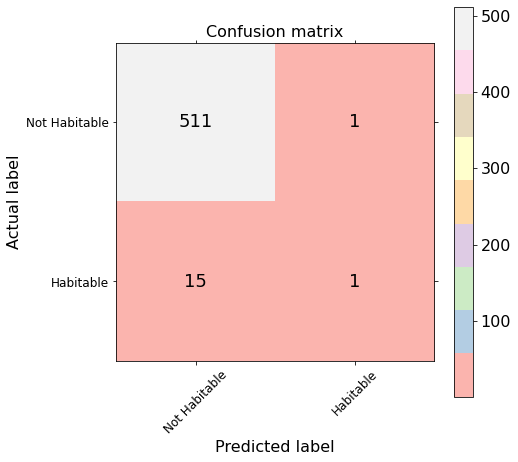

In [54]:
plot_confusion()

P_MASS       6.191786
P_RADIUS     3.938292
P_FLUX      89.869919
dtype: float32


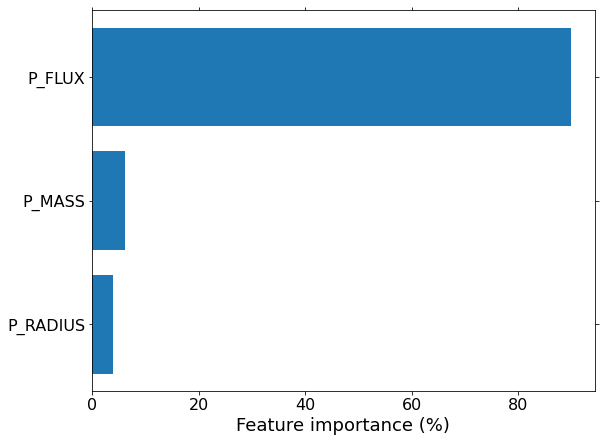

In [55]:
# Plot feature importance
fimport = clf_XGB.feature_importances_
# convert the xgboost output as a serie
importance = pd.Series(fimport*100.,index=list(data_clf)[0:X.shape[1]]) # list(df) list the headers
print(importance)
importance = importance.sort_values(ascending=True) # sort the values before plotting
ind = np.arange(0,X.shape[1],1)   # indices from 0 to 4 with step of 1
plt.figure(figsize=(9,7))
plt.barh(ind,importance) # horizontal bars
plt.yticks(ind,importance.index) # importance.index are the name of the features
plt.xlabel('Feature importance (%)')
plt.show()

The planet mean distance and the stellar luminosity determine the Habitable zone (inner and outer limit), while the planet radius and mass constrain the type planet, i.e. if the planet has a solid surface.

In [56]:
# Deep Neural Network
clf=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(50,150,50),
                  early_stopping=True,random_state=10)
y_pred, y_prob = scoring(clf, X_train, y_train, X_test, y_test, Xs_solar_system, y_solar_system)

	score (train): 0.993
	score (test): 0.987
	score (solar system): 0.625
[3.05697674e-08 7.85536550e-02 5.97666379e-01 7.06994120e-01
 6.02504422e-01 4.84960829e-01 9.24342636e-01 9.70774484e-01]
Test
	Brier: 0.011
	Precision (Efficiency): 0.846
	Recall (Completeness): 0.688
	F1: 0.759

Solar System
	Brier: 0.331
	Precision (Efficiency): 0.400
	Recall (Completeness): 1.000
	F1: 0.571




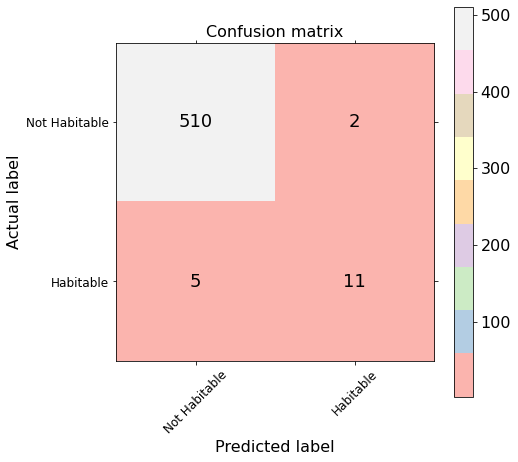

In [57]:
plot_confusion() # the neural network misses two habitable planets

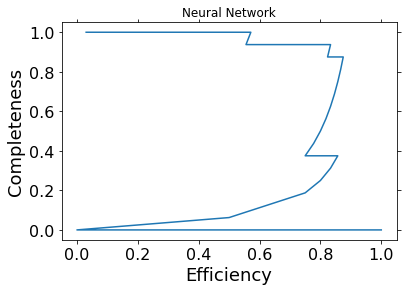

In [58]:
plot_completeness_efficiency('Neural Network')

In [59]:
# Learning Vector Quantization
from LVQClassifier import *
clf=LVQClassifier(n_components=150,alpha=0.3,p=2,epochs=20,initial_state='Uniform',LVQ2=True)
y_pred, y_prob = scoring(clf, X_train, y_train, X_test, y_test, Xs_solar_system, y_solar_system)

	score (train): 0.928
	score (test): 0.905
	score (solar system): 0.500
[0.24496741 0.15922619 0.14981921 0.21184471 0.59874004 0.88507355
 0.17514712 0.21639574]
Test
	Brier: 0.088
	Precision (Efficiency): 0.095
	Recall (Completeness): 0.250
	F1: 0.138

Solar System
	Brier: 0.331
	Precision (Efficiency): 0.000
	Recall (Completeness): 0.000
	F1: 0.000




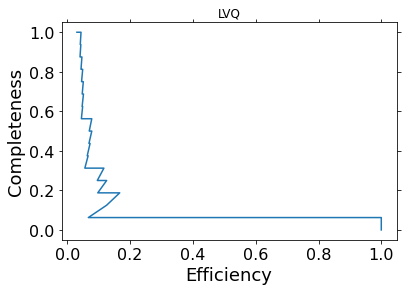

In [60]:
plot_completeness_efficiency('LVQ')

In [61]:
# Logistic Regression from sklearn
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=100,class_weight='balanced')
y_pred, y_prob = scoring(clf, X_train, y_train, X_test, y_test, Xs_solar_system, y_solar_system)

	score (train): 0.871
	score (test): 0.860
	score (solar system): 0.250
[0.67657459 0.83771808 0.85990514 0.87262737 0.9108297  0.88760993
 0.88104518 0.88147395]
Test
	Brier: 0.082
	Precision (Efficiency): 0.178
	Recall (Completeness): 1.000
	F1: 0.302

Solar System
	Brier: 0.546
	Precision (Efficiency): 0.250
	Recall (Completeness): 1.000
	F1: 0.400




In [62]:
# Orthogonal Distance Regression Methods
# One-versus-the-Rest
from ODLinear import (OrthogonalDistanceLogisticRegressionOVR,
                      OrthogonalDistanceMultinomialLogisticRegression)
clf = OrthogonalDistanceLogisticRegressionOVR(C=100)
y_pred, y_prob = scoring(clf, X_train, y_train, X_test, y_test, Xs_solar_system, y_solar_system)

	score (train): 0.978
	score (test): 0.970
	score (solar system): 0.750
[0.02282258 0.05471173 0.06464633 0.07377794 0.07293454 0.05471451
 0.06619841 0.06694077]
Test
	Brier: 0.028
	Precision (Efficiency): 0.500
	Recall (Completeness): 0.062
	F1: 0.111

Solar System
	Brier: 0.219
	Precision (Efficiency): 0.000
	Recall (Completeness): 0.000
	F1: 0.000




/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [63]:
X_train.shape[0]

2111

In [64]:
# Orthogonal Distance Regression Mutinomial Method
clf = OrthogonalDistanceMultinomialLogisticRegression(C=100, tol=1e-2)
y_pred, y_prob = scoring(clf, X_train, y_train, X_test, y_test, Xs_solar_system, y_solar_system)

	score (train): 0.978
	score (test): 0.970
	score (solar system): 0.750
[0.13943839 0.21842453 0.23716357 0.25302503 0.23425645 0.2133621
 0.23903307 0.24021351]
Test
	Brier: 0.022
	Precision (Efficiency): 0.500
	Recall (Completeness): 0.062
	F1: 0.111

Solar System
	Brier: 0.178
	Precision (Efficiency): 0.000
	Recall (Completeness): 0.000
	F1: 0.000




/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [65]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
y_pred, y_prob = scoring(clf, X_train, y_train, X_test, y_test, Xs_solar_system, y_solar_system)

	score (train): 0.990
	score (test): 0.996
	score (solar system): 0.750
[3.55291381e-45 2.12353280e-01 8.47198658e-01 7.29439115e-01
 9.99245237e-01 9.41410223e-01 3.41707191e-01 3.33694567e-01]
Test
	Brier: 0.006
	Precision (Efficiency): 0.889
	Recall (Completeness): 1.000
	F1: 0.941

Solar System
	Brier: 0.282
	Precision (Efficiency): 0.500
	Recall (Completeness): 1.000
	F1: 0.667




It seems to be quite easy to predict the habitability of an exoplanet! But in fact the classes are imbalance, so that the accuracy score is not a good measure of classification sucess. Other scoring metrics such as precision, recall, and F1 reveal that the neural network performs quite well in term of completeness and efficiency.

The algorithms were trained with the Kepler-discovered planets and are not capable to determine the hability of the planets in the Solar System.